In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [78]:
df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [80]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
df.nunique().dropna()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [82]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


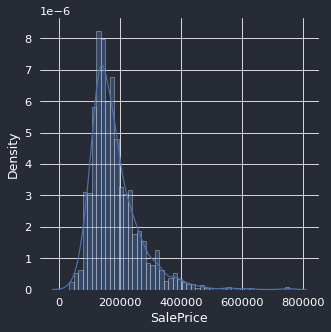

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
sns.set_style('dark')
#axes.set_xticklabels([])
#axes.set_yticklabels([])
sns.distplot(df['SalePrice'],ax=axes)
sns.set('paper',font_scale=1.3,rc={'figure.facecolor':'#262b35','axes.facecolor':'#262b35'})
axes.spines['bottom'].set_color('white')
axes.spines['left'].set_color('white')
axes.xaxis.label.set_color('white')
axes.yaxis.label.set_color('white')
axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')
sns.despine(left=True,bottom=True)

In [87]:
corr_series=df.drop(["SalePrice"],axis=1).corrwith(df["SalePrice"], axis = 0)
corr_series = corr_series[(corr_series >= 0.5) | (corr_series<=-0.5)]

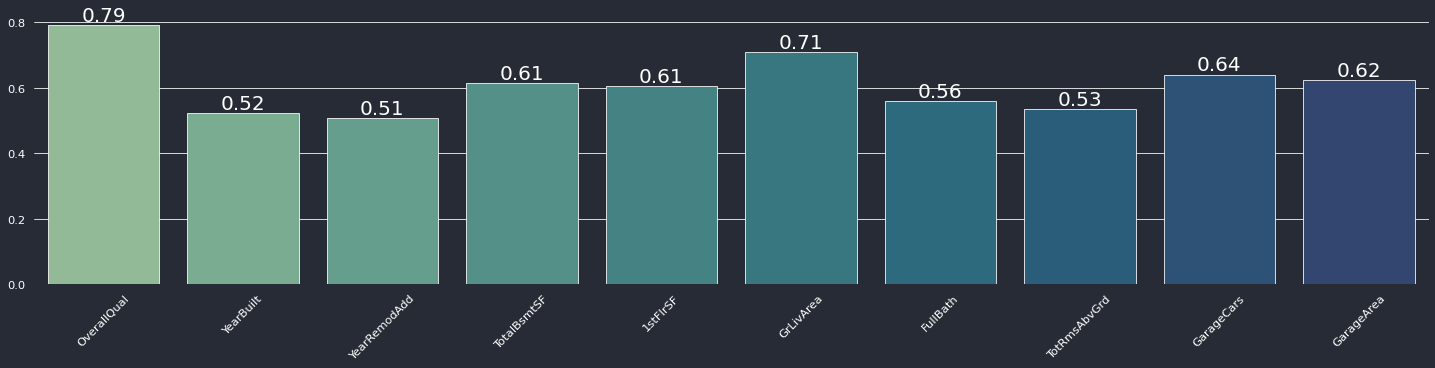

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25,5))
sns.barplot(x=corr_series.index,y=corr_series.values, palette="crest", ax=axes)
plt.xticks(rotation=45)
for p in axes.patches:
    axes.text(p.get_x() + p.get_width()/2., p.get_height(), '%0.2f' % float(p.get_height()), 
            fontsize=20, color='white', ha='center', va='bottom')
sns.set_style('darkgrid')
sns.set('paper',font_scale=2,rc={'figure.facecolor':'#262b35','axes.facecolor':'#262b35'})
axes.spines['bottom'].set_color('white')
axes.spines['left'].set_color('white')
axes.xaxis.label.set_color('white')
axes.yaxis.label.set_color('white')
axes.tick_params(axis='x', colors='white')
axes.tick_params(axis='y', colors='white')
sns.despine(left=True,bottom=True)

In [89]:
imp_cols = corr_series.index
df[imp_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   1stFlrSF      1460 non-null   int64
 5   GrLivArea     1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   GarageArea    1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


In [90]:
corr = df.corr()

<AxesSubplot:>

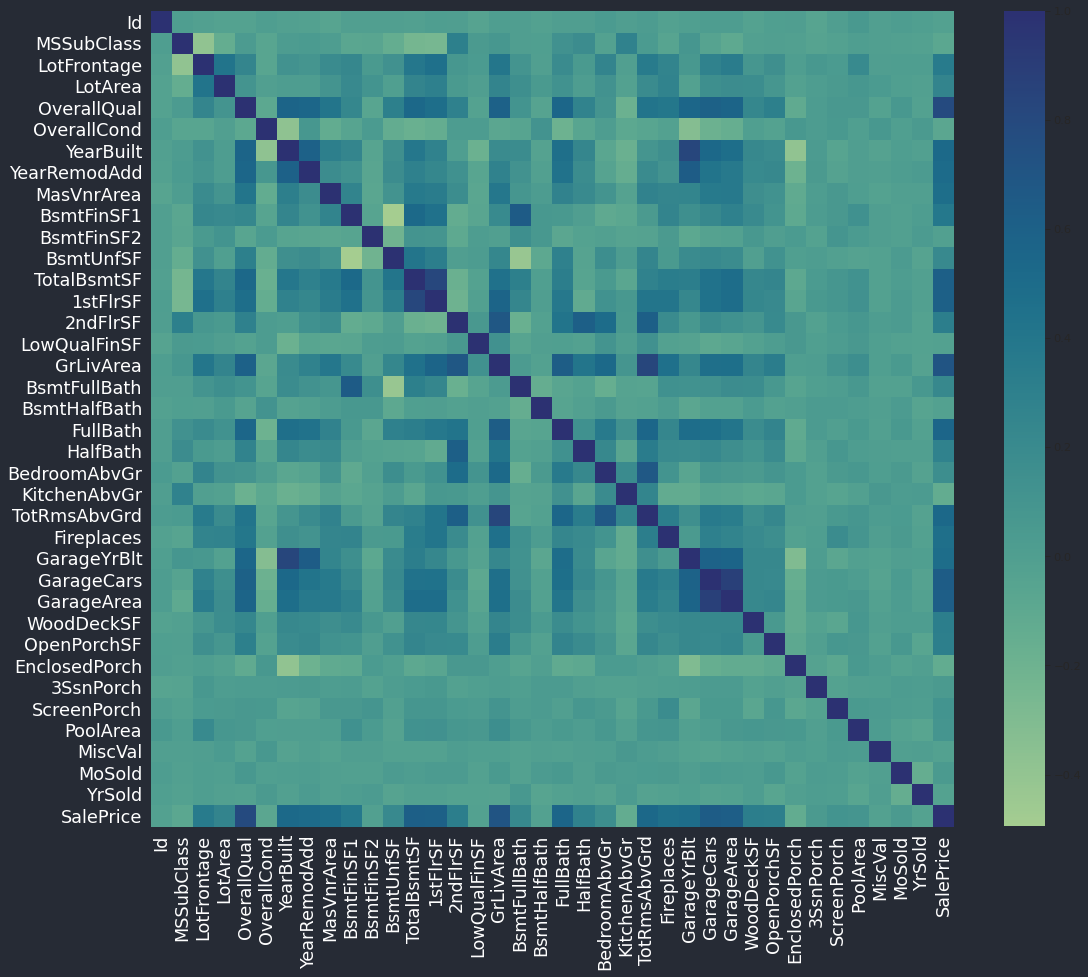

In [91]:
f, ax = plt.subplots(figsize=(18,15))
sns.set_style('darkgrid')
sns.despine(left=True,bottom=True)
sns.set('paper',font_scale=1.3,rc={'figure.facecolor':'#262b35','axes.facecolor':'#262b35'})
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
sns.heatmap(corr,axes=ax,cmap='crest')   #vmax is to limit the range of colours

<AxesSubplot:>

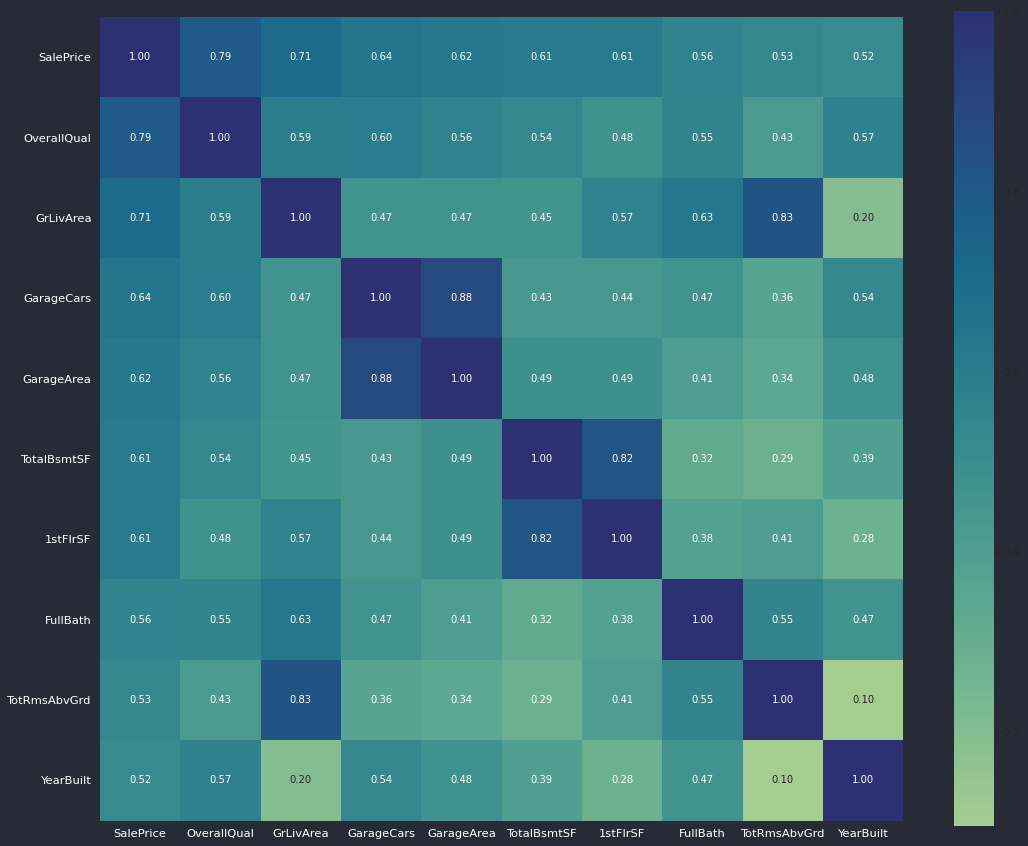

In [92]:
cols = corr.sort_values(by="SalePrice",ascending=False).head(10).index
corr1 = df[cols].corr()
f, ax = plt.subplots(figsize=(18,15))
sns.set_style('darkgrid')
sns.despine(left=True,bottom=True)
sns.set('paper',font_scale=1.3,rc={'figure.facecolor':'#262b35','axes.facecolor':'#262b35'})
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
sns.heatmap(corr1, axes=ax,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},cmap='crest')

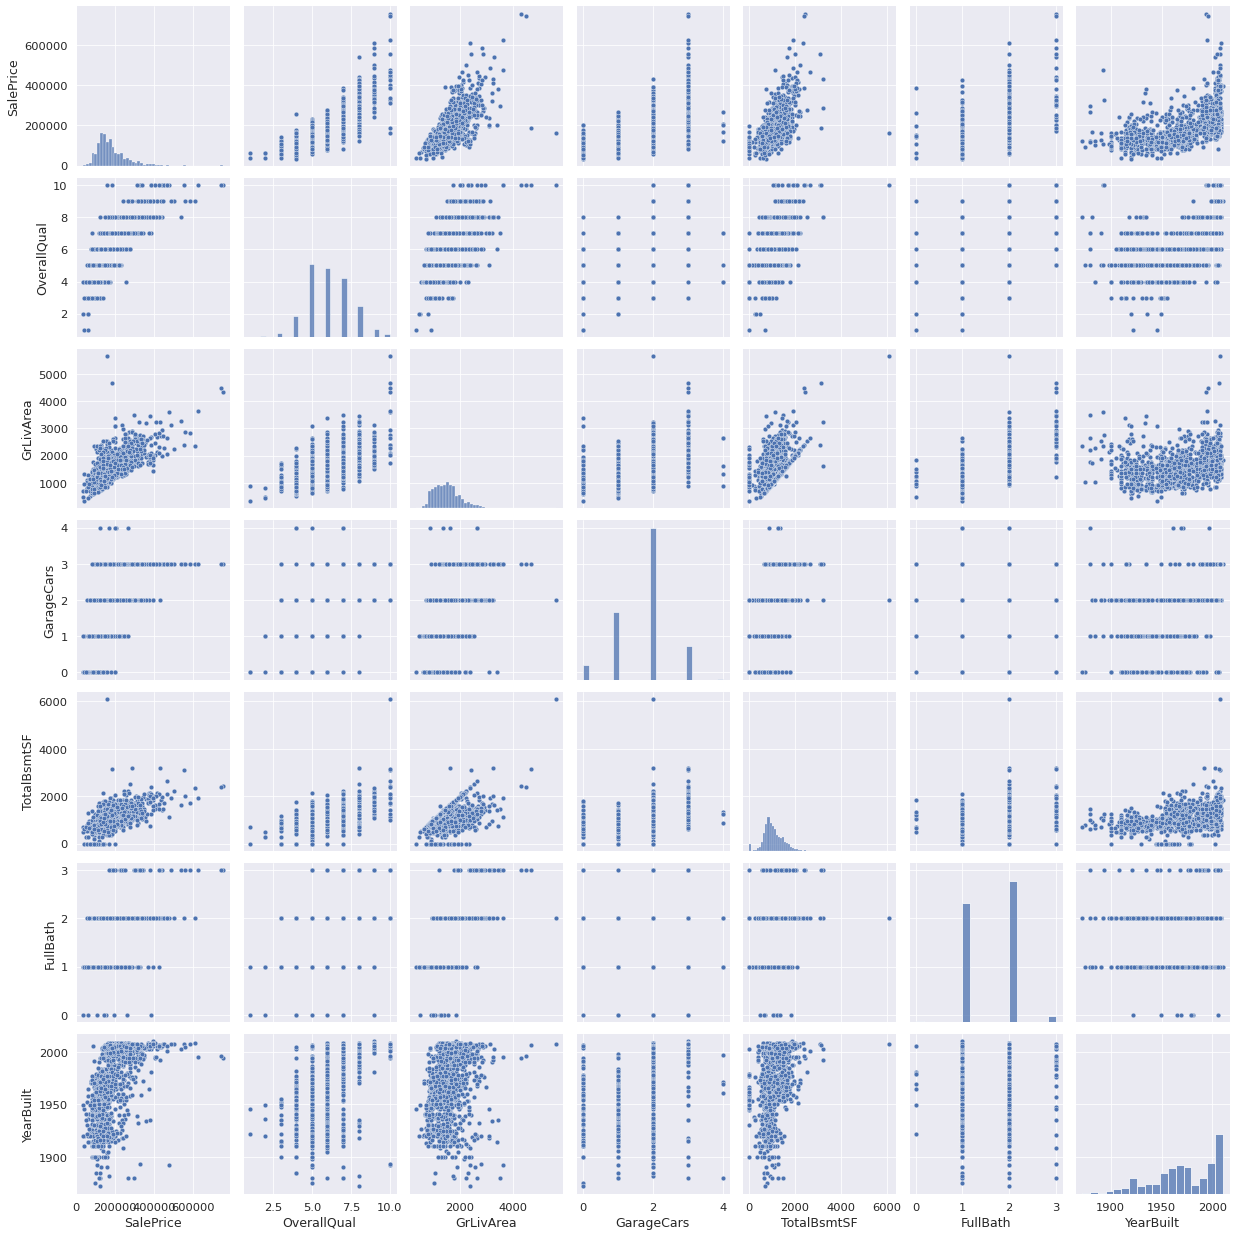

In [93]:
final_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set_style('darkgrid')
#sns.set('paper',font_scale=1.25,rc={'figure.facecolor':'black'})  #'axes.facecolor':'black'
sns.pairplot(df[final_cols],height=2.5,aspect = 1,palette='Crest')

In [94]:
#Converting certain apparently numberic into categorical features
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [95]:
types = df.dtypes
cat_cols = types[types.values=="object"].index
num_cols = df.columns.drop(cat_cols)

In [96]:
#df.shape
#cat_cols.shape[0]
#num_cols.shape[0]

In [97]:
#Skewness of Numerical Features (Taking Log)
skew_values = df[num_cols].apply(lambda x: skew(x))
skew_list = skew_values[abs(skew_values)>=0.5].index
df[skew_list] = np.log(df[skew_list])
skew_list.drop("SalePrice")

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')